## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import scipy.stats as sts
import numpy as np
import sklearn.datasets as dta

# Study data files
ind_menwomen_path = "data/industry_emp_men_women.csv"
ind_totalemp_path = "data/Industry_totalemployed.csv"
ind_ethnicity_path = "data/industry_ethnicity.csv"
ind_genethnicity_path= "data/gender_ethnicity.csv"
ind_timethnicity_path= "data/ethnicity.csv"
ind_ceo_age_path= "data/CEOS_Managers.csv"
ind_ceo_gen_path= "data/ceos_across_ethnicity.csv"
ind_ceo_year_path= "data/ceos_year.csv"


# Read the mouse data and the study results
ind_menwomen_metadata = pd.read_csv(ind_menwomen_path)
ind_totalemp_metadata = pd.read_csv(ind_totalemp_path)
ind_ethnicity_metadata = pd.read_csv(ind_ethnicity_path)
ind_genethnicity_metadata = pd.read_csv(ind_genethnicity_path)
ind_timethnicity_metadata = pd.read_csv(ind_timethnicity_path)
ind_ceo_age_metadata  = pd.read_csv(ind_ceo_age_path)
ind_ceo_gen_metadata  = pd.read_csv(ind_ceo_gen_path)
ind_ceo_year_metadata  = pd.read_csv(ind_ceo_year_path)


ind_totalemp_metadata.head(50)


# Display the data table for preview


,Industry Type,Total Employed,"Manage-ment, business, and financial operations occupations",Professional and related occupations,Protective service occupations,"Service occupations, except protective",Sales\nand\nrelated\noccupations,Office\nand\nadminis-\ntrative\nsupport\noccupations,"Farming,\nfishing,\nand\nforestry occupations",Construc-\ntion\nand\nextraction\noccupations,"Instal-\nlation,\nmainte-\nnance, and repair occupations",Production\noccupations,Transpor-\ntation\nand\nmaterial\nmoving\noccupations
0,Agriculture and related,"2,425","1,008",42,15,98,17,81,993,12,26,38,93
1,"Mining, quarrying, and oil and gas extraction",750,155,127,2,5,11,63,0,212,53,40,81
2,Construction,"11,373","2,311",289,24,37,118,529,4,"7,044",589,160,267
3,Manufacturing,"15,741","2,851","2,304",30,232,608,"1,275",50,300,706,"6,150","1,235"
4,Durable goods,"9,970","1,757","1,665",17,106,341,765,4,241,443,"3,955",676
5,Nondurable goods,"5,771","1,094",639,12,126,267,510,46,59,263,"2,196",559
6,Wholesale and retail trade,"19,742","1,455","1,156",57,658,"9,759","3,096",58,98,718,566,"2,121"
7,Wholesale trade,"3,525",518,170,7,46,"1,309",525,40,23,128,113,646
8,Retail trade,"16,217",937,986,50,612,"8,450","2,572",19,74,590,452,"1,475"
9,Transportation and utilities,"8,991",933,410,42,142,136,"1,888",7,178,518,405,"4,332"


In [17]:
ind_totalemp_metadata = ind_totalemp_metadata.rename(columns={"Manage-ment, business, and financial operations occupations":"Management occupations",
                                                              "Professional and related occupations":"Professional occupations",
                                                              "Protective service occupations":"Protective occupations",
                                                              "Service occupations, except protective":"Except Protective occupations",
                                                              "Sales\nand\nrelated\noccupations":"Sales occupations",
                                                              "Office\nand\nadminis-\ntrative\nsupport\noccupations":"Office Administration occupations",
                                                              "Farming,\nfishing,\nand\nforestry occupations":"Farming Fishing occupations",
                                                              "Construc-\ntion\nand\nextraction\noccupations":"Construction occupations",
                                                              "Instal-\nlation,\nmainte-\nnance, and repair occupations":"Installation Maintenance occupations",
                                                              "Production\noccupations":"Prudction occupations",
                                                              "Transpor-\ntation\nand\nmaterial\nmoving\noccupations":"Transportation occupations"})

In [18]:
ind_totalemp_metadata

,Industry Type,Total Employed,Management occupations,Professional occupations,Protective occupations,Except Protective occupations,Sales occupations,Office Administration occupations,Farming Fishing occupations,Construction occupations,Installation Maintenance occupations,Prudction occupations,Transportation occupations
0,Agriculture and related,"2,425","1,008",42,15,98,17,81,993,12,26,38,93
1,"Mining, quarrying, and oil and gas extraction",750,155,127,2,5,11,63,0,212,53,40,81
2,Construction,"11,373","2,311",289,24,37,118,529,4,"7,044",589,160,267
3,Manufacturing,"15,741","2,851","2,304",30,232,608,"1,275",50,300,706,"6,150","1,235"
4,Durable goods,"9,970","1,757","1,665",17,106,341,765,4,241,443,"3,955",676
5,Nondurable goods,"5,771","1,094",639,12,126,267,510,46,59,263,"2,196",559
6,Wholesale and retail trade,"19,742","1,455","1,156",57,658,"9,759","3,096",58,98,718,566,"2,121"
7,Wholesale trade,"3,525",518,170,7,46,"1,309",525,40,23,128,113,646
8,Retail trade,"16,217",937,986,50,612,"8,450","2,572",19,74,590,452,"1,475"
9,Transportation and utilities,"8,991",933,410,42,142,136,"1,888",7,178,518,405,"4,332"


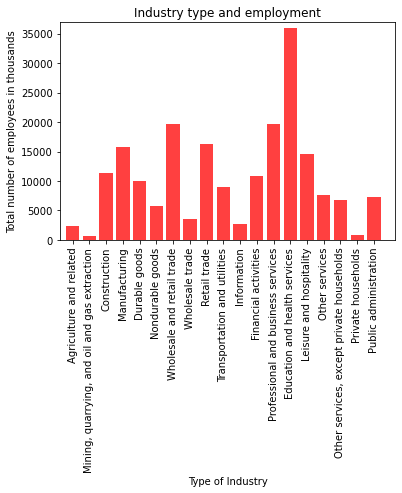

<Figure size 432x288 with 0 Axes>

In [19]:
#This is bar chart for the total employment and type of industry the employment distributed
#ind_totalemp_metadata['Industry Type']=ind_totalemp_metadata['Industry Type'].str.replace(',','')
industry_type = ind_totalemp_metadata["Industry Type"].astype('string')
#total_emp = ind_totalemp_metadata["Total Employed"]
ind_totalemp_metadata['Total Employed']=ind_totalemp_metadata['Total Employed'].str.replace(',','')
total_emp = ind_totalemp_metadata["Total Employed"].astype('float')
#total_emp = ind_totalemp_metadata["Total Employed"].astype('float')
dd_data =['Agriculture and related', 'Mining quarrying and oil and gas extraction', 'Construction', 'Manufacturing', 'Durable goods', 'Nondurable goods', 'Wholesale and retail trade', 'Wholesale trade', 'Retail trade', 'Transportation and utilities', 'Information', 'Financial activities', 'Professional and business services', 'Education and health services', 'Leisure and hospitality', 'Other services', 'Other services except private households', 'Private households', 'Public administration']

x_axis = np.arange(0, len(industry_type))
tick_locations = []
for x in industry_type:
    tick_locations.append(str(x))

plt.title("Industry type and employment")
plt.xlabel("Type of Industry")
plt.ylabel("Total number of employees in thousands")

plt.xlim(-0.75, len(industry_type)+.25)
#plt.ylim(0, max(total_emp) )
#plt.xlim(-0.75, len(gyms)-.25)
plt.ylim(0, max(total_emp) + 1000)

plt.bar(x_axis, total_emp, facecolor="red", alpha=0.75, align="center")
plt.xticks(range(0, len(industry_type)), industry_type, rotation="90")
plt.savefig("industry_total_employment.png")
plt.show()
plt.tight_layout()


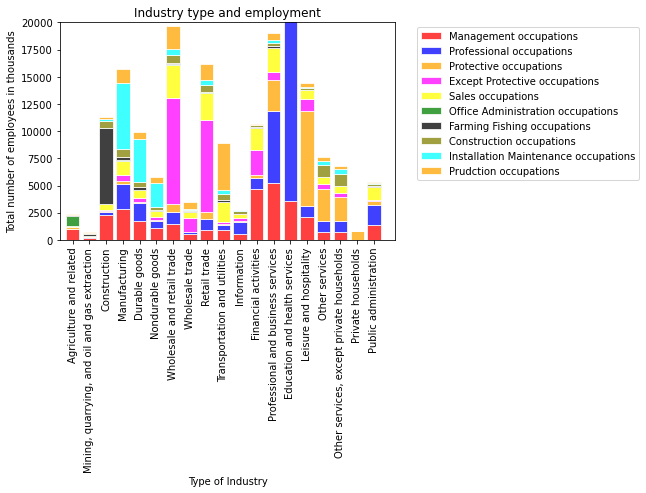

<Figure size 432x288 with 0 Axes>

In [20]:
n=len(industry_type)
ind_totalemp_metadata['Management occupations']=ind_totalemp_metadata["Management occupations"].astype('string')
ind_totalemp_metadata['Professional occupations']=ind_totalemp_metadata['Professional occupations'].astype('string')
ind_totalemp_metadata['Except Protective occupations']=ind_totalemp_metadata['Except Protective occupations'].astype('string')
ind_totalemp_metadata['Sales occupations']=ind_totalemp_metadata['Sales occupations'].astype('string')
ind_totalemp_metadata['Office Administration occupations']=ind_totalemp_metadata['Office Administration occupations'].astype('string')
#ind_totalemp_metadata['Farming Fishing occupations']=ind_totalemp_metadata['Farming Fishing occupations'].astype('string')
ind_totalemp_metadata['Construction occupations']=ind_totalemp_metadata['Construction occupations'].astype('string')
ind_totalemp_metadata['Installation Maintenance occupations']=ind_totalemp_metadata['Installation Maintenance occupations'].astype('string')
ind_totalemp_metadata['Prudction occupations']=ind_totalemp_metadata['Prudction occupations'].astype('string')
ind_totalemp_metadata['Transportation occupations']=ind_totalemp_metadata['Transportation occupations'].astype('string')


ind_totalemp_metadata['Management occupations']=ind_totalemp_metadata['Management occupations'].str.replace(',','')
ind_totalemp_metadata['Professional occupations']=ind_totalemp_metadata['Professional occupations'].str.replace(',','')
ind_totalemp_metadata['Except Protective occupations']=ind_totalemp_metadata['Except Protective occupations'].str.replace(',','')
ind_totalemp_metadata['Sales occupations']=ind_totalemp_metadata['Sales occupations'].str.replace(',','')
ind_totalemp_metadata['Office Administration occupations']=ind_totalemp_metadata['Office Administration occupations'].str.replace(',','')
#ind_totalemp_metadata['Farming Fishing occupations']=ind_totalemp_metadata['Farming Fishing occupations'].str.replace(',','')
ind_totalemp_metadata['Construction occupations']=ind_totalemp_metadata['Construction occupations'].str.replace(',','')
ind_totalemp_metadata['Installation Maintenance occupations']=ind_totalemp_metadata['Installation Maintenance occupations'].str.replace(',','')
ind_totalemp_metadata['Prudction occupations']=ind_totalemp_metadata['Prudction occupations'].str.replace(',','')
ind_totalemp_metadata['Transportation occupations']=ind_totalemp_metadata['Transportation occupations'].str.replace(',','')



ind_totalemp_metadata['Management occupations']=ind_totalemp_metadata["Management occupations"].astype('float')
ind_totalemp_metadata['Professional occupations']=ind_totalemp_metadata['Professional occupations'].astype('float')
ind_totalemp_metadata['Except Protective occupations']=ind_totalemp_metadata['Except Protective occupations'].astype('float')
ind_totalemp_metadata['Sales occupations']=ind_totalemp_metadata['Sales occupations'].astype('float')
ind_totalemp_metadata['Office Administration occupations']=ind_totalemp_metadata['Office Administration occupations'].astype('float')
ind_totalemp_metadata['Farming Fishing occupations']=ind_totalemp_metadata['Farming Fishing occupations'].astype('float')
ind_totalemp_metadata['Construction occupations']=ind_totalemp_metadata['Construction occupations'].astype('float')
ind_totalemp_metadata['Installation Maintenance occupations']=ind_totalemp_metadata['Installation Maintenance occupations'].astype('float')
ind_totalemp_metadata['Prudction occupations']=ind_totalemp_metadata['Prudction occupations'].astype('float')
ind_totalemp_metadata['Transportation occupations']=ind_totalemp_metadata['Transportation occupations'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(industry_type))
Management_occ = []
Professional_occ = []
except_Professional_occ = []
sales_Professional_occ = []
office_Professional_occ = []
farming_Professional_occ = []
construction_Professional_occ = []
installation_Professional_occ = []
prudction_Professional_occ = []
transport_Professional_occ = []

for x in x_axis:
    Management_occ.append(ind_totalemp_metadata['Management occupations'][x])
    Professional_occ.append(ind_totalemp_metadata['Professional occupations'][x])
    except_Professional_occ.append(ind_totalemp_metadata['Except Protective occupations'][x])
    sales_Professional_occ.append(ind_totalemp_metadata['Sales occupations'][x])
    office_Professional_occ.append(ind_totalemp_metadata['Office Administration occupations'][x])
    farming_Professional_occ.append(ind_totalemp_metadata['Farming Fishing occupations'][x])
    construction_Professional_occ.append(ind_totalemp_metadata['Construction occupations'][x])
    installation_Professional_occ.append(ind_totalemp_metadata['Installation Maintenance occupations'][x])
    prudction_Professional_occ.append(ind_totalemp_metadata['Prudction occupations'][x])
    transport_Professional_occ.append(ind_totalemp_metadata['Transportation occupations'][x])

plt.title("Industry type and employment")
plt.xlabel("Type of Industry")
plt.ylabel("Total number of employees in thousands")
total_emp = ind_totalemp_metadata["Management occupations"].astype('float') +10
plt.xlim(-0.75, len(industry_type)+.25)
#plt.ylim(0, max(total_emp) )
#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, 5000)
#plt.ylim(0, max(ind_totalemp_metadata['Professional occupations'])+ 100)
plt.ylim(0, 20000)
clr=["bar1","bar2","bar3","bar4","bar5","bar6","bar7","bar1","bar1","bar1"]
clt = []
clt.append(ind_totalemp_metadata.columns[2])
clt.append(ind_totalemp_metadata.columns[3])
clt.append(ind_totalemp_metadata.columns[4])
clt.append(ind_totalemp_metadata.columns[5])
clt.append(ind_totalemp_metadata.columns[6])
clt.append(ind_totalemp_metadata.columns[7])
clt.append(ind_totalemp_metadata.columns[8])
clt.append(ind_totalemp_metadata.columns[9])
clt.append(ind_totalemp_metadata.columns[10])
clt.append(ind_totalemp_metadata.columns[11])


bar3 = np.add(Management_occ, Professional_occ).tolist()
bar4 = np.add(except_Professional_occ, bar3).tolist()
bar5 = np.add(sales_Professional_occ, bar4).tolist()
bar6 = np.add(office_Professional_occ, bar5).tolist()
bar7 = np.add(farming_Professional_occ, bar6).tolist()
bar8 = np.add(construction_Professional_occ, bar7).tolist()
bar9 = np.add(installation_Professional_occ, bar8).tolist()
bar10 = np.add(prudction_Professional_occ, bar9).tolist()



p1=plt.bar(x_axis, Management_occ, facecolor="red", color = "red", edgecolor="white", alpha=0.75, align="center")
p2=plt.bar(x_axis, Professional_occ, facecolor="blue", color = "blue", bottom=Management_occ, edgecolor="white", alpha=0.75, align="center")
p3=plt.bar(x_axis, except_Professional_occ, facecolor="orange", color = "orange", bottom=bar3, edgecolor="white", alpha=0.75, align="center")
p4=plt.bar(x_axis, sales_Professional_occ, facecolor="magenta", color = "magenta", bottom=bar4, edgecolor="white", alpha=0.75, align="center")
p5=plt.bar(x_axis, office_Professional_occ, facecolor="yellow", color = "yellow", bottom=bar5, edgecolor="white", alpha=0.75, align="center")
p6=plt.bar(x_axis, farming_Professional_occ, facecolor="green", color = "green", bottom=bar6, edgecolor="white", alpha=0.75, align="center")
p7=plt.bar(x_axis, construction_Professional_occ, facecolor="black", color = "black", bottom=bar7, edgecolor="white", alpha=0.75, align="center")
p8=plt.bar(x_axis, installation_Professional_occ, facecolor="olive", color = "olive", bottom=bar8, edgecolor="white", alpha=0.75, align="center")
p9=plt.bar(x_axis, prudction_Professional_occ, facecolor="cyan", color = "cyan", bottom=bar9, edgecolor="white", alpha=0.75, align="center")
p10=plt.bar(x_axis, transport_Professional_occ, facecolor="orange", color = "orange", bottom=bar10, edgecolor="white", alpha=0.75, align="center")

plt.xticks(range(0, len(industry_type)), industry_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
plt.legend((p1,p2,p3,p4,p5,p6,p7,p8,p9,p10), clt, loc='upper left', bbox_to_anchor=(1.05,1))

plt.savefig("industry_total_employment_stacked.png")
plt.show()
plt.tight_layout()

In [6]:
ind_menwomen_metadata

,"Industry, sex, and race",Total employed,Men,Women
0,Agriculture and related,"2,425","1,790",635
1,"Mining, quarrying, and oil and gas extraction",750,632,118
2,Construction,"11,373","10,205","1,168"
3,Manufacturing,"15,741","11,111","4,630"
4,Durable goods,"9,970","7,465","2,505"
5,Nondurable goods,"5,771","3,646","2,125"
6,Wholesale and retail trade,"19,742","11,014","8,728"
7,Wholesale trade,"3,525","2,517","1,008"
8,Retail trade,"16,217","8,497","7,721"
9,Transportation and utilities,"8,991","6,824","2,166"


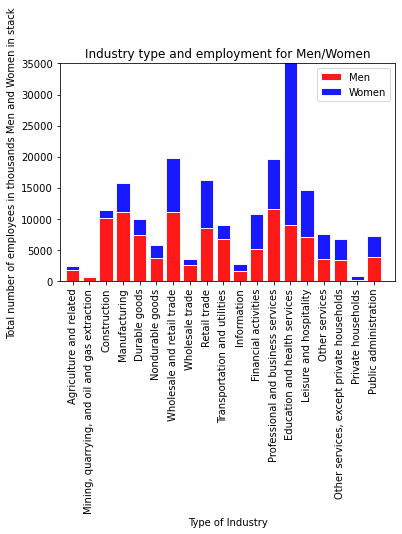

<Figure size 432x288 with 0 Axes>

In [7]:
n=len(industry_type)
ind_menwomen_metadata['Men']=ind_menwomen_metadata["Men"].astype('string')
ind_menwomen_metadata['Women']=ind_menwomen_metadata['Women'].astype('string')


ind_menwomen_metadata['Men']=ind_menwomen_metadata['Men'].str.replace(',','')
ind_menwomen_metadata['Women']=ind_menwomen_metadata['Women'].str.replace(',','')



ind_menwomen_metadata['Men']=ind_menwomen_metadata["Men"].astype('float')
ind_menwomen_metadata['Women']=ind_menwomen_metadata['Women'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(industry_type))
Men_occ = []
Women_occ = []

for x in x_axis:
    Men_occ.append(ind_menwomen_metadata['Men'][x])
    Women_occ.append(ind_menwomen_metadata['Women'][x])

plt.title("Industry type and employment for Men/Women")
plt.xlabel("Type of Industry")
plt.ylabel("Total number of employees in thousands Men and Women in stack")
total_emp = ind_menwomen_metadata["Men"].astype('float') +10
plt.xlim(-0.75, len(industry_type)+.25)
#plt.ylim(0, max(total_emp) )
#plt.xlim(-0.75, len(gyms)-.25)
plt.ylim(0, 27000)
#plt.ylim(0, max(ind_totalemp_metadata['Professional occupations'])+ 100)
plt.ylim(0, 35000)

clt = []
clt.append(ind_menwomen_metadata.columns[2])
clt.append(ind_menwomen_metadata.columns[3])

p1=plt.bar(x_axis, Men_occ, facecolor="red", color = "red", edgecolor="white", alpha=0.9, align="center")
p2=plt.bar(x_axis, Women_occ, facecolor="blue", color = "blue", bottom=Men_occ, edgecolor="white", alpha=0.9, align="center")

plt.xticks(range(0, len(industry_type)), industry_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
plt.legend((p1,p2), clt, loc='upper right', bbox_to_anchor=(1,1))
plt.savefig("industry_total_gender.png")
plt.show()
plt.tight_layout()

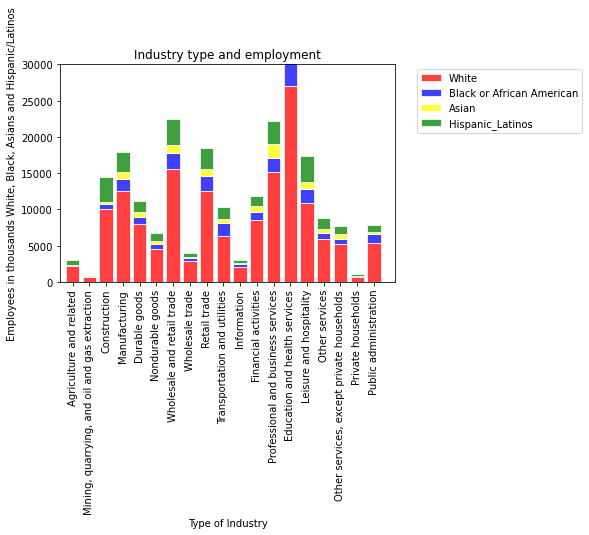

<Figure size 432x288 with 0 Axes>

In [8]:
n=len(industry_type)
ind_ethnicity_metadata['White']=ind_ethnicity_metadata["White"].astype('string')
ind_ethnicity_metadata['Black or African American']=ind_ethnicity_metadata['Black or African American'].astype('string')
ind_ethnicity_metadata['Asian']=ind_ethnicity_metadata["Asian"].astype('string')
#ind_ethnicity_metadata['Hispanic_Latinos']=ind_ethnicity_metadata["Hispanic_Latinos"].astype('string')


ind_ethnicity_metadata['White']=ind_ethnicity_metadata['White'].str.replace(',','')
ind_ethnicity_metadata['Black or African American']=ind_ethnicity_metadata['Black or African American'].str.replace(',','')
ind_ethnicity_metadata['Asian']=ind_ethnicity_metadata['Asian'].str.replace(',','')
#ind_ethnicity_metadata['Hispanic_Latinos']=ind_ethnicity_metadata['Hispanic_Latinos'].str.replace(',','')



ind_ethnicity_metadata['White']=ind_ethnicity_metadata["White"].astype('float')
ind_ethnicity_metadata['Black or African American']=ind_ethnicity_metadata['Black or African American'].astype('float')
ind_ethnicity_metadata['Asian']=ind_ethnicity_metadata["Asian"].astype('float')
ind_ethnicity_metadata['Hispanic_Latinos']=ind_ethnicity_metadata["Hispanic_Latinos"].astype('float')




tick_locations = []
x_axis = np.arange(0, len(industry_type))
White_occ = []
Black_occ = []
Asian_occ = []
Hispanic_occ = []

for x in x_axis:
    White_occ.append(ind_ethnicity_metadata['White'][x])
    Black_occ.append(ind_ethnicity_metadata['Black or African American'][x])
    Asian_occ.append(ind_ethnicity_metadata['Asian'][x])
    Hispanic_occ.append(ind_ethnicity_metadata['Hispanic_Latinos'][x])

plt.title("Industry type and employment")
plt.xlabel("Type of Industry")
plt.ylabel("Employees in thousands White, Black, Asians and Hispanic/Latinos")
total_emp = ind_ethnicity_metadata["White"].astype('float') +10
plt.xlim(-0.75, len(industry_type)+.25)
#plt.ylim(0, max(total_emp) )
#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, 30000)
#plt.ylim(0, max(ind_totalemp_metadata['Professional occupations'])+ 100)
plt.ylim(0, 30000)

clt = []
clt.append(ind_ethnicity_metadata.columns[2])
clt.append(ind_ethnicity_metadata.columns[3])
clt.append(ind_ethnicity_metadata.columns[4])
clt.append(ind_ethnicity_metadata.columns[5])
bars = np.add(White_occ, Black_occ).tolist()
bars1 = np.add(Asian_occ, bars).tolist()

p1=plt.bar(x_axis, White_occ, facecolor="red", color = "red", edgecolor="white", alpha=0.75, align="center")
p2=plt.bar(x_axis, Black_occ, facecolor="blue", color = "blue", bottom=White_occ, edgecolor="white", alpha=0.75, align="center")
p3=plt.bar(x_axis, Asian_occ, facecolor="yellow", color = "yellow",bottom=bars, edgecolor="white", alpha=0.75, align="center")
p4=plt.bar(x_axis, Hispanic_occ, facecolor="green", color = "green",bottom=bars1, edgecolor="white", alpha=0.75, align="center")

plt.xticks(range(0, len(industry_type)), industry_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
plt.legend((p1,p2,p3,p4), clt, loc='upper left', bbox_to_anchor=(1.05,1))
plt.savefig("industry_total_ethnicity.png")
plt.show()
plt.tight_layout()

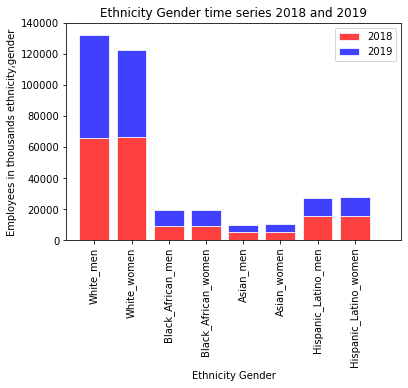

<Figure size 432x288 with 0 Axes>

In [9]:

ind_genethnicity_metadata
genethnicity_type = ind_genethnicity_metadata["Ethnicity_Gender"].astype('string')
n=len(genethnicity_type)
ind_genethnicity_metadata['2018']=ind_genethnicity_metadata["2018"].astype('string')
ind_genethnicity_metadata['2019']=ind_genethnicity_metadata['2019'].astype('string')


ind_genethnicity_metadata['2018']=ind_genethnicity_metadata['2018'].str.replace(',','')
ind_genethnicity_metadata['2019']=ind_genethnicity_metadata['2019'].str.replace(',','')



ind_genethnicity_metadata['2018']=ind_genethnicity_metadata["2018"].astype('float')
ind_genethnicity_metadata['2019']=ind_genethnicity_metadata['2019'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(genethnicity_type))
y2018_occ = []
y2019_occ = []

for x in x_axis:
    y2018_occ.append(ind_genethnicity_metadata['2018'][x])
    y2019_occ.append(ind_genethnicity_metadata['2019'][x])


plt.title("Ethnicity Gender time series 2018 and 2019")
plt.xlabel("Ethnicity Gender")
plt.ylabel("Employees in thousands ethnicity,gender")
total_emp = ind_ethnicity_metadata["White"].astype('float') +10
plt.xlim(-0.75, len(genethnicity_type)+.25)
#plt.ylim(0, max(total_emp) )
#plt.xlim(-0.75, len(gyms)-.25)
#plt.ylim(0, 30000)
#plt.ylim(0, max(ind_totalemp_metadata['Professional occupations'])+ 100)
plt.ylim(0, 140000)

clt = []
clt.append(ind_genethnicity_metadata.columns[1])
clt.append(ind_genethnicity_metadata.columns[2])

bars = np.add(y2018_occ, y2019_occ).tolist()

p1=plt.bar(x_axis, y2018_occ, facecolor="red", color = "red", edgecolor="white", alpha=0.75, align="center")
p2=plt.bar(x_axis, y2019_occ, facecolor="blue", color = "blue", bottom=y2018_occ, edgecolor="white", alpha=0.75, align="center")

plt.xticks(range(0, len(genethnicity_type)), genethnicity_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
plt.legend((p1,p2), clt, loc='upper right', bbox_to_anchor=(1,1))
plt.savefig("industry_total_gender_ethnicity.png")
plt.show()
plt.tight_layout()


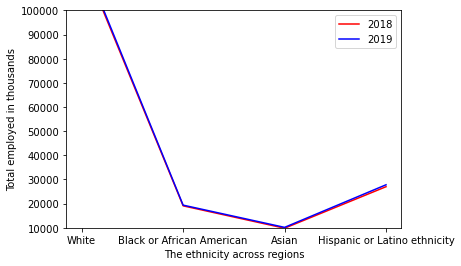

In [10]:


ethnicity_type = ind_timethnicity_metadata["Ethnicity"].astype('string').tolist()
n=len(ethnicity_type)


ind_timethnicity_metadata['2018']=ind_timethnicity_metadata["2018"].astype('string')
ind_timethnicity_metadata['2019']=ind_timethnicity_metadata['2019'].astype('string')


ind_timethnicity_metadata['2018']=ind_timethnicity_metadata['2018'].str.replace(',','')
ind_timethnicity_metadata['2019']=ind_timethnicity_metadata['2019'].str.replace(',','')



ind_timethnicity_metadata['2018']=ind_timethnicity_metadata["2018"].astype('float')
ind_timethnicity_metadata['2019']=ind_timethnicity_metadata['2019'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(ethnicity_type))
y2018_occ = ind_timethnicity_metadata["2018"].tolist()
y2019_occ = ind_timethnicity_metadata["2019"].tolist()

# Give our graph axis labels
plt.xlabel("The ethnicity across regions")
plt.ylabel("Total employed in thousands")
plt.ylim(10000, 100000)
plt.plot(ethnicity_type, y2018_occ,  color = "red", label = "2018")
plt.plot(ethnicity_type, y2019_occ,  color = "blue", label = "2019")
plt.savefig("industry_total_ethnicity_time.png")
plt.legend()

# Have to plot our chart once again as it doesn't stick after being shown

#p1=plt.plot(x_axis, y2018_occ,  color = "red")
#p2=plt.plot(x_axis, y2019_occ, color = "blue")

#plt.xlabel("Month of the Year")
#plt.ylabel("Avg Temp in Fahrenheit/Celcius")
#plt.plot(  e_x, y_axis)
#plt.plot(  e_x, c_y_axis)

#plt.xticks(range(0, len(ethnicity_type)), ethnicity_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
#plt.legend((p1,p2), clt, loc='upper right', bbox_to_anchor=(1,1))
#plt.savefig("industry_total_gender_ethnicity.png")
#plt.show()





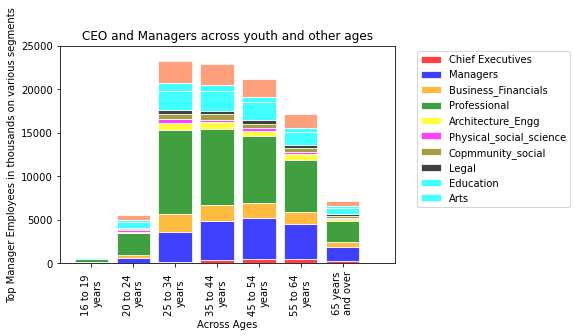

<Figure size 432x288 with 0 Axes>

In [11]:




ceo_manager_type = ind_ceo_age_metadata["Age Range"].astype('string')
n=len(ceo_manager_type)
#ind_ceo_age_metadata['Chief Executives']=ind_ceo_age_metadata['Chief Executives'].astype('string')
ind_ceo_age_metadata['Managers']=ind_ceo_age_metadata['Managers'].astype('string')
ind_ceo_age_metadata['Business_Financials']=ind_ceo_age_metadata['Business_Financials'].astype('string')
ind_ceo_age_metadata['Professional']=ind_ceo_age_metadata['Professional'].astype('string')
#ind_ceo_age_metadata['Architecture_Engg']=ind_ceo_age_metadata['Architecture_Engg'].astype('string')
#ind_ceo_age_metadata['Physical_social_science']=ind_ceo_age_metadata['Physical_social_science'].astype('string')
#ind_ceo_age_metadata['Copmmunity_social']=ind_ceo_age_metadata['Copmmunity_social'].astype('string')
#ind_ceo_age_metadata['Legal']=ind_ceo_age_metadata['Legal'].astype('string')
ind_ceo_age_metadata['Education']=ind_ceo_age_metadata['Education'].astype('string')
#ind_ceo_age_metadata['Arts']=ind_ceo_age_metadata['Arts'].astype('string')
ind_ceo_age_metadata['Health_care']=ind_ceo_age_metadata['Health_care'].astype('string')


#ind_ceo_age_metadata['Chief Executives']=ind_ceo_age_metadata['Chief Executives'].str.replace(',','')
ind_ceo_age_metadata['Managers']=ind_ceo_age_metadata['Managers'].str.replace(',','')
ind_ceo_age_metadata['Business_Financials']=ind_ceo_age_metadata['Business_Financials'].str.replace(',','')
ind_ceo_age_metadata['Professional']=ind_ceo_age_metadata['Professional'].str.replace(',','')
#ind_ceo_age_metadata['Architecture_Engg']=ind_ceo_age_metadata['Architecture_Engg'].str.replace(',','')
#ind_ceo_age_metadata['Physical_social_science']=ind_ceo_age_metadata['Physical_social_science'].str.replace(',','')
#ind_ceo_age_metadata['Copmmunity_social']=ind_ceo_age_metadata['Copmmunity_social'].str.replace(',','')
#ind_ceo_age_metadata['Legal']=ind_ceo_age_metadata['Legal'].str.replace(',','')
ind_ceo_age_metadata['Business_Financials']=ind_ceo_age_metadata['Business_Financials'].str.replace(',','')
#ind_ceo_age_metadata['Arts']=ind_ceo_age_metadata['Arts'].str.replace(',','')
ind_ceo_age_metadata['Education']=ind_ceo_age_metadata['Education'].str.replace(',','')
ind_ceo_age_metadata['Health_care']=ind_ceo_age_metadata['Health_care'].str.replace(',','')



ind_ceo_age_metadata['Chief Executives']=ind_ceo_age_metadata["Chief Executives"].astype('float')
ind_ceo_age_metadata['Managers']=ind_ceo_age_metadata['Managers'].astype('float')
ind_ceo_age_metadata['Business_Financials']=ind_ceo_age_metadata['Business_Financials'].astype('float')
ind_ceo_age_metadata['Professional']=ind_ceo_age_metadata['Professional'].astype('float')
ind_ceo_age_metadata['Architecture_Engg']=ind_ceo_age_metadata['Architecture_Engg'].astype('float')
ind_ceo_age_metadata['Physical_social_science']=ind_ceo_age_metadata['Physical_social_science'].astype('float')
ind_ceo_age_metadata['Copmmunity_social']=ind_ceo_age_metadata['Copmmunity_social'].astype('float')
ind_ceo_age_metadata['Legal']=ind_ceo_age_metadata['Legal'].astype('float')
ind_ceo_age_metadata['Education']=ind_ceo_age_metadata['Education'].astype('float')
ind_ceo_age_metadata['Arts']=ind_ceo_age_metadata['Arts'].astype('float')
ind_ceo_age_metadata['Health_care']=ind_ceo_age_metadata['Health_care'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(ceo_manager_type))
ceo_occ = []
man_occ = []
bus_occ = []
pro_occ = []
arc_occ = []
phy_occ = []
com_occ = []
leg_occ = []
edu_occ = []
art_occ = []
hea_occ = []

for x in x_axis:
    ceo_occ.append(ind_ceo_age_metadata['Chief Executives'][x])
    man_occ.append(ind_ceo_age_metadata['Managers'][x])
    bus_occ.append(ind_ceo_age_metadata['Business_Financials'][x])
    pro_occ.append(ind_ceo_age_metadata['Professional'][x])
    arc_occ.append(ind_ceo_age_metadata['Architecture_Engg'][x])
    phy_occ.append(ind_ceo_age_metadata['Physical_social_science'][x])
    com_occ.append(ind_ceo_age_metadata['Copmmunity_social'][x])
    leg_occ.append(ind_ceo_age_metadata['Legal'][x])
    edu_occ.append(ind_ceo_age_metadata['Education'][x])
    art_occ.append(ind_ceo_age_metadata['Arts'][x])
    hea_occ.append(ind_ceo_age_metadata['Health_care'][x])

plt.title("CEO and Managers across youth and other ages")
plt.xlabel("Across Ages")
plt.ylabel("Top Manager Employees in thousands on various segments")
total_emp = ind_ceo_age_metadata["Chief Executives"].astype('float') +10
plt.xlim(-0.75, len(ceo_manager_type)+.25)
plt.ylim(0, 10000)
clt = []
clt.append(ind_ceo_age_metadata.columns[1])
clt.append(ind_ceo_age_metadata.columns[2])
clt.append(ind_ceo_age_metadata.columns[3])
clt.append(ind_ceo_age_metadata.columns[4])
clt.append(ind_ceo_age_metadata.columns[5])
clt.append(ind_ceo_age_metadata.columns[6])
clt.append(ind_ceo_age_metadata.columns[7])
clt.append(ind_ceo_age_metadata.columns[8])
clt.append(ind_ceo_age_metadata.columns[9])
clt.append(ind_ceo_age_metadata.columns[10])

bars = np.add(ceo_occ, man_occ).tolist()
bars1 = np.add(bus_occ, bars).tolist()
bars2 = np.add(pro_occ, bars1).tolist()
bars3 = np.add(arc_occ, bars2).tolist()
bars4 = np.add(phy_occ, bars3).tolist()
bars5 = np.add(com_occ, bars4).tolist()
bars6 = np.add(leg_occ, bars5).tolist()
bars7 = np.add(edu_occ, bars6).tolist()
bars8 = np.add(art_occ, bars7).tolist()

p1=plt.bar(x_axis, ceo_occ, facecolor="red", color = "red", edgecolor="white", alpha=0.75, align="center")
p2=plt.bar(x_axis, man_occ, facecolor="blue", color = "blue", bottom=ceo_occ, edgecolor="white", alpha=0.75, align="center")
p3=plt.bar(x_axis, bus_occ, facecolor="orange", color = "orange", bottom=bars, edgecolor="white", alpha=0.75, align="center")
p4=plt.bar(x_axis, pro_occ, facecolor="green", color = "green", bottom=bars1, edgecolor="white", alpha=0.75, align="center")
p5=plt.bar(x_axis, arc_occ, facecolor="yellow", color = "yellow", bottom=bars2, edgecolor="white", alpha=0.75, align="center")
p6=plt.bar(x_axis, phy_occ, facecolor="magenta", color = "magenta", bottom=bars3, edgecolor="white", alpha=0.75, align="center")
p7=plt.bar(x_axis, com_occ, facecolor="olive", color = "olive", bottom=bars4, edgecolor="white", alpha=0.75, align="center")
p8=plt.bar(x_axis, leg_occ, facecolor="black", color = "black", bottom=bars5, edgecolor="white", alpha=0.75, align="center")
p9=plt.bar(x_axis, edu_occ, facecolor="cyan", color = "cyan", bottom=bars6, edgecolor="white", alpha=0.75, align="center")
p10=plt.bar(x_axis, art_occ, facecolor="aqua", color = "aqua", bottom=bars7, edgecolor="white", alpha=0.75, align="center")
p11=plt.bar(x_axis, hea_occ, facecolor="Coral", color = "Coral", bottom=bars8, edgecolor="white", alpha=0.75, align="center")

plt.xticks(range(0, len(ceo_manager_type)), ceo_manager_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
plt.legend((p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11), clt,  bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylim(0, 25000)
plt.savefig("industry_total_ceo_manager_youth.png")
plt.show()
plt.tight_layout()


,CEO_Across_Ethnicity,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Men,13122.930,13280.553,13424.220,13692.393,14072.212,14488.656,14834.140,15274.460,15805.152,15862.962
1,Women,17682.070,17676.447,17940.780,18224.607,18806.788,19363.344,19663.860,20247.540,20780.848,21374.038
2,Black,2834.060,2817.087,2916.945,2968.281,3189.263,3317.496,3380.804,3658.766,3841.530,3909.885
3,White,23627.435,23744.019,23429.655,23682.414,24034.549,24610.404,25563.018,27671.638,28244.392,28560.779
4,Asian,2156.350,2105.076,2446.470,2649.111,2827.594,2945.124,3173.816,3303.546,3512.256,3723.700
5,Latinos,2187.155,2290.818,2571.930,2617.194,2827.594,2978.976,2380.362,3303.546,3512.256,3686.463


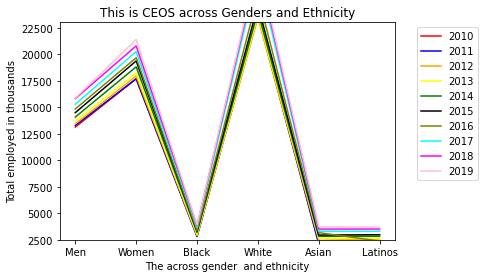

In [14]:
ind_ceo_gen_metadata



ceo_gen_type_trunc = ind_ceo_gen_metadata["CEO_Across_Ethnicity"].astype('string').tolist()
n=len(ceo_gen_type_trunc)



#ind_ceo_gen_metadata['2010']=ind_ceo_gen_metadata['2010'].astype('string')
#ind_ceo_gen_metadata['2011']=ind_ceo_gen_metadata['2011'].astype('string')
#ind_ceo_gen_metadata['2012']=ind_ceo_gen_metadata['2012'].astype('string')
#ind_ceo_gen_metadata['2013']=ind_ceo_gen_metadata['2013'].astype('string')
#ind_ceo_gen_metadata['2014']=ind_ceo_gen_metadata['2014'].astype('string')
##ind_ceo_gen_metadata['2015']=ind_ceo_gen_metadata['2015'].astype('string')
#ind_ceo_gen_metadata['2016']=ind_ceo_gen_metadata['2016'].astype('string')
#ind_ceo_gen_metadata['2017']=ind_ceo_gen_metadata['2017'].astype('string')
##ind_ceo_gen_metadata['2018']=ind_ceo_gen_metadata['2018'].astype('string')
#ind_ceo_gen_metadata['2019']=ind_ceo_gen_metadata['2019'].astype('string')


#ind_ceo_age_metadata['Chief Executives']=ind_ceo_age_metadata['Chief Executives'].str.replace(',','')
#ind_ceo_gen_metadata['2010']=ind_ceo_gen_metadata['2010'].str.replace(',','')
#ind_ceo_gen_metadata['2011']=ind_ceo_gen_metadata['2011'].str.replace(',','')
#ind_ceo_gen_metadata['2012']=ind_ceo_gen_metadata['2012'].str.replace(',','')
#ind_ceo_gen_metadata['2013']=ind_ceo_gen_metadata['2013'].str.replace(',','')
#ind_ceo_gen_metadata['2014']=ind_ceo_gen_metadata['2014'].str.replace(',','')
#ind_ceo_gen_metadata['2015']=ind_ceo_gen_metadata['2015'].str.replace(',','')
#ind_ceo_gen_metadata['2016']=ind_ceo_gen_metadata['2016'].str.replace(',','')
#ind_ceo_gen_metadata['2017']=ind_ceo_gen_metadata['2017'].str.replace(',','')
#ind_ceo_gen_metadata['2018']=ind_ceo_gen_metadata['2018'].str.replace(',','')
#ind_ceo_gen_metadata['2019']=ind_ceo_gen_metadata['2019'].str.replace(',','')

ind_ceo_gen_metadata['2010']=ind_ceo_gen_metadata["2010"].astype('float')
ind_ceo_gen_metadata['2011']=ind_ceo_gen_metadata['2011'].astype('float')
ind_ceo_gen_metadata['2012']=ind_ceo_gen_metadata['2012'].astype('float')
ind_ceo_gen_metadata['2013']=ind_ceo_gen_metadata['2013'].astype('float')
ind_ceo_gen_metadata['2014']=ind_ceo_gen_metadata['2014'].astype('float')
ind_ceo_gen_metadata['2015']=ind_ceo_gen_metadata['2015'].astype('float')
ind_ceo_gen_metadata['2016']=ind_ceo_gen_metadata['2016'].astype('float')
ind_ceo_gen_metadata['2017']=ind_ceo_gen_metadata['2017'].astype('float')
ind_ceo_gen_metadata['2018']=ind_ceo_gen_metadata['2018'].astype('float')
ind_ceo_gen_metadata['2019']=ind_ceo_gen_metadata['2019'].astype('float')



tick_locations = []
x_axis = np.arange(0, len(ceo_gen_type_trunc))
y2010_occ = []
y2011_occ = []
y2012_occ = []
y2013_occ = []
y2014_occ = []
y2015_occ = []
y2016_occ = []
y2017_occ = []
y2018_occ = []
y2019_occ = []



#for x in x_axis:
#    ind_ceo_gen_metadata['2010'][x]= (ind_ceo_gen_metadata['2010'][x]*ind_ceo_gen_metadata['2010'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2011'][x]= (ind_ceo_gen_metadata['2011'][x]*ind_ceo_gen_metadata['2011'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2012'][x]= (ind_ceo_gen_metadata['2012'][x]*ind_ceo_gen_metadata['2012'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2013'][x]= (ind_ceo_gen_metadata['2013'][x]*ind_ceo_gen_metadata['2013'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2014'][x]= (ind_ceo_gen_metadata['2014'][x]*ind_ceo_gen_metadata['2014'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2015'][x]= (ind_ceo_gen_metadata['2015'][x]*ind_ceo_gen_metadata['2015'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2016'][x]= (ind_ceo_gen_metadata['2016'][x]*ind_ceo_gen_metadata['2016'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2017'][x]= (ind_ceo_gen_metadata['2017'][x]*ind_ceo_gen_metadata['2017'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2018'][x]= (ind_ceo_gen_metadata['2018'][x]*ind_ceo_gen_metadata['2018'][len(ceo_gen_type)-1]/100)
#    ind_ceo_gen_metadata['2019'][x]= (ind_ceo_gen_metadata['2019'][x]*ind_ceo_gen_metadata['2019'][len(ceo_gen_type)-1]/100)



for x in x_axis:
    y2010_occ.append(ind_ceo_gen_metadata['2010'][x])
    y2011_occ.append(ind_ceo_gen_metadata['2011'][x])
    y2012_occ.append(ind_ceo_gen_metadata['2012'][x])
    y2013_occ.append(ind_ceo_gen_metadata['2013'][x])
    y2014_occ.append(ind_ceo_gen_metadata['2014'][x])
    y2015_occ.append(ind_ceo_gen_metadata['2015'][x])
    y2016_occ.append(ind_ceo_gen_metadata['2016'][x])
    y2017_occ.append(ind_ceo_gen_metadata['2017'][x])
    y2018_occ.append(ind_ceo_gen_metadata['2018'][x])
    y2019_occ.append(ind_ceo_gen_metadata['2019'][x])





x_axis = np.arange(0, len(ceo_gen_type_trunc))

tick_locations = []

# Give our graph axis labels
plt.title("This is CEOS across Genders and Ethnicity")
plt.xlabel("The across gender  and ethnicity")
plt.ylabel("Total employed in thousands")
plt.ylim(2500, 23000)
plt.plot(ceo_gen_type_trunc, y2010_occ,  color = "red", label = "2010")
plt.plot(ceo_gen_type_trunc, y2011_occ,  color = "blue", label = "2011")
plt.plot(ceo_gen_type_trunc, y2012_occ,  color = "orange", label = "2012")
plt.plot(ceo_gen_type_trunc, y2013_occ,  color = "yellow", label = "2013")
plt.plot(ceo_gen_type_trunc, y2014_occ,  color = "green", label = "2014")
plt.plot(ceo_gen_type_trunc, y2015_occ,  color = "black", label = "2015")
plt.plot(ceo_gen_type_trunc, y2016_occ,  color = "olive", label = "2016")
plt.plot(ceo_gen_type_trunc, y2017_occ,  color = "cyan", label = "2017")
plt.plot(ceo_gen_type_trunc, y2018_occ,  color = "magenta", label = "2018")
plt.plot(ceo_gen_type_trunc, y2019_occ,  color = "pink", label = "2019")
plt.savefig("ceos_etchnicity_gender.png")
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))


#y2010_occ = ind_ceo_gen_metadata["2010"].tolist()
#y2011_occ = ind_ceo_gen_metadata["2011"].tolist()

# Give our graph axis labels
#plt.xlabel("The ethnicity across regions")
#plt.ylabel("Total employed in thousands")
#plt.ylim(10000, 100000)
#plt.plot(ethnicity_type, y2018_occ,  color = "red", label = "2018")
#plt.plot(ethnicity_type, y2019_occ,  color = "blue", label = "2019")
#plt.savefig("industry_total_ethnicity_time.png")
#plt.legend()

# Have to plot our chart once again as it doesn't stick after being shown

#p1=plt.plot(x_axis, y2018_occ,  color = "red")
#p2=plt.plot(x_axis, y2019_occ, color = "blue")

#plt.xlabel("Month of the Year")
#plt.ylabel("Avg Temp in Fahrenheit/Celcius")
#plt.plot(  e_x, y_axis)
#plt.plot(  e_x, c_y_axis)

#plt.xticks(range(0, len(ethnicity_type)), ethnicity_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
#plt.legend((p1,p2), clt, loc='upper right', bbox_to_anchor=(1,1))
#plt.savefig("industry_total_gender_ethnicity.png")
#plt.show()
ind_ceo_gen_metadata

,Year,Men,Women,Black,White,Asian,Latinos
0,2010,13122.930,17682.070,2834.060,23627.435,2156.350,2187.155
1,2011,13280.553,17676.447,2817.087,23744.019,2105.076,2290.818
2,2012,13424.220,17940.780,2916.945,23429.655,2446.470,2571.930
3,2013,13692.393,18224.607,2968.281,23682.414,2649.111,2617.194
4,2014,14072.212,18806.788,3189.263,24034.549,2827.594,2827.594
5,2015,14488.656,19363.344,3317.496,24610.404,2945.124,2978.976
6,2016,14834.140,19663.860,3380.804,25563.018,3173.816,2380.362
7,2017,15274.460,20247.540,3658.766,27671.638,3303.546,3303.546
8,2018,15805.152,20780.848,3841.530,28244.392,3512.256,3512.256
9,2019,15862.962,21374.038,3909.885,28560.779,3723.700,3686.463


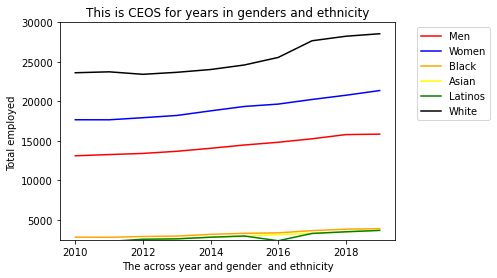

In [13]:




ceo_year_type = ind_ceo_year_metadata["Year"].astype('int').tolist()
n=len(ceo_year_type)



ind_ceo_year_metadata['Men']=ind_ceo_year_metadata["Men"].astype('float')
ind_ceo_year_metadata['Women']=ind_ceo_year_metadata['Women'].astype('float')
ind_ceo_year_metadata['Black']=ind_ceo_year_metadata['Black'].astype('float')
ind_ceo_year_metadata['Asian']=ind_ceo_year_metadata['Asian'].astype('float')
ind_ceo_year_metadata['Latinos']=ind_ceo_year_metadata['Latinos'].astype('float')
ind_ceo_year_metadata['White']=ind_ceo_year_metadata['White'].astype('float')




tick_locations = []
x_axis = np.arange(0, len(ceo_year_type))
men_occ = []
women_occ = []
black_occ = []
asian_occ = []
latinos_occ = []
white_occ = []




for x in x_axis:
    men_occ.append(ind_ceo_year_metadata['Men'][x])
    women_occ.append(ind_ceo_year_metadata['Women'][x])
    black_occ.append(ind_ceo_year_metadata['Black'][x])
    asian_occ.append(ind_ceo_year_metadata['Asian'][x])
    latinos_occ.append(ind_ceo_year_metadata['Latinos'][x])
    white_occ.append(ind_ceo_year_metadata['White'][x])
    





x_axis = np.arange(0, len(ceo_year_type))

tick_locations = []

# Give our graph axis labels
plt.title("This is CEOS for years in genders and ethnicity")
plt.xlabel("The across year and gender  and ethnicity")
plt.ylabel("Total employed ")
plt.ylim(2500, 30000)
plt.plot(ceo_year_type, men_occ,  color = "red", label = "Men")
plt.plot(ceo_year_type, women_occ,  color = "blue", label = "Women")
plt.plot(ceo_year_type, black_occ,  color = "orange", label = "Black")
plt.plot(ceo_year_type, asian_occ,  color = "yellow", label = "Asian")
plt.plot(ceo_year_type, latinos_occ,  color = "green", label = "Latinos")
plt.plot(ceo_year_type, white_occ,  color = "black", label = "White")


plt.savefig("ceos_year_gender.png")
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))


#y2010_occ = ind_ceo_gen_metadata["2010"].tolist()
#y2011_occ = ind_ceo_gen_metadata["2011"].tolist()

# Give our graph axis labels
#plt.xlabel("The ethnicity across regions")
#plt.ylabel("Total employed in thousands")
#plt.ylim(10000, 100000)
#plt.plot(ethnicity_type, y2018_occ,  color = "red", label = "2018")
#plt.plot(ethnicity_type, y2019_occ,  color = "blue", label = "2019")
#plt.savefig("industry_total_ethnicity_time.png")
#plt.legend()

# Have to plot our chart once again as it doesn't stick after being shown

#p1=plt.plot(x_axis, y2018_occ,  color = "red")
#p2=plt.plot(x_axis, y2019_occ, color = "blue")

#plt.xlabel("Month of the Year")
#plt.ylabel("Avg Temp in Fahrenheit/Celcius")
#plt.plot(  e_x, y_axis)
#plt.plot(  e_x, c_y_axis)

#plt.xticks(range(0, len(ethnicity_type)), ethnicity_type, rotation="vertical")
#plt.legend(clr,clt, loc="best")
#plt.legend((p1,p2), clt, loc='upper right', bbox_to_anchor=(1,1))
#plt.savefig("industry_total_gender_ethnicity.png")
#plt.show()
ind_ceo_year_metadata